# Part II - FORD GOBIKE SYSTEM
## by Abdelhak BENYAHIA


## Investigation Overview


> we are going to investigate **Ford GoBike System**
> we are going to find out when (start time, ride duration..) the system is mostly used and by whom (membership, gender ,age) is used the most.
> Also we are going to find out if there is a relationship between user type and other features.




## Dataset Overview

>This dataset includes information about FORD GOBIKE SYSTEM trips made in february 2019 in the San Francisco Bay area by. 
At start the dataset had 183412 trip record with 16 features classified into three gategories.
**category 1: ride time** ( date, start time, end time, ride duration..), **category 2 : ride stations** ( start station , end station) and **category 3: rider** ( membership, gender ,age)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
from datetime import datetime, timedelta

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_bike = pd.read_csv('201902-fordgobike-tripdata.csv')

#making copy of the dataset 
df_bike_copy = df_bike.copy()

# droping missing values 
df_bike_copy.dropna(axis=0,inplace=True)

# convert start_time and end_time to time type
df_bike_copy['start_time'] = pd.to_datetime(df_bike_copy['start_time'])
df_bike_copy['end_time'] = pd.to_datetime(df_bike_copy['end_time'])

# convert the columns (_id) to object type
df_bike_copy['start_station_id'] = df_bike_copy['start_station_id'].astype(str)
df_bike_copy['end_station_id'] = df_bike_copy['end_station_id'].astype(str)
df_bike_copy['bike_id'] = df_bike_copy['bike_id'].astype(str)

# convert birth year to integer
df_bike_copy['member_birth_year'] = df_bike_copy['member_birth_year'].astype(int)

# change the user type and gender to category format 
df_bike_copy['user_type'] = df_bike_copy['user_type'].astype('category')
df_bike_copy['member_gender'] = df_bike_copy['member_gender'].astype('category')

# adding a calculated column to calculate the age of the users
df_bike_copy['AGE'] = 2019 - df_bike_copy['member_birth_year']
df_bike_copy['AGE'] = df_bike_copy['AGE'].astype(int)

# Add calculated columns expression the duration (duration in min , start date/hour/day)
df_bike_copy['duration_minute'] = df_bike_copy['duration_sec']/60
df_bike_copy['start_date'] = df_bike_copy.start_time.dt.strftime('%Y-%m-%d')
df_bike_copy['start_hour'] = df_bike_copy.start_time.dt.strftime('%H')
df_bike_copy['start_day'] = df_bike_copy.start_time.dt.strftime('%A')

# convert to suitable types
df_bike_copy['duration_minute'] = df_bike_copy['duration_minute'].astype(int)
df_bike_copy['start_date'] = pd.to_datetime(df_bike_copy['start_date'])
df_bike_copy['start_hour'] = df_bike_copy['start_hour'].astype(int)

# make final clean copy for the dataset
df_bike_final = df_bike_copy.copy()

## Rider informations

> *  The system is mostly used by subscribers (90%)


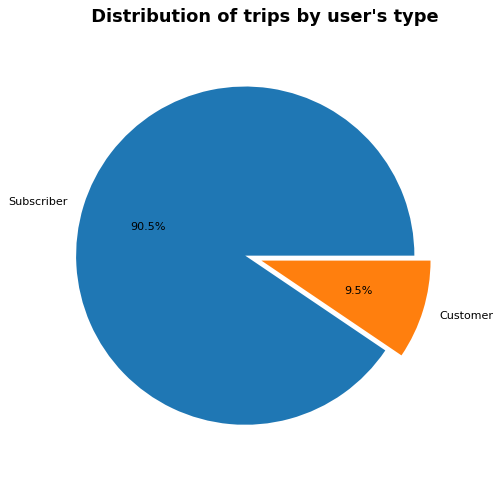

In [3]:
# user type percentage
sorted_type = df_bike_final['user_type'].value_counts()
plt.figure(figsize = [7, 7], dpi= 80, facecolor='w', edgecolor='k')
colors = sb.color_palette()
plt.title(" Distribution of trips by user's type", y=1.05, fontsize=16, fontweight='bold');
explode = (0.1, 0)
plt.pie(
    sorted_type,
    labels = sorted_type.index,
    startangle = 0,
    colors = colors,
    autopct = '%1.1f%%',
    explode=explode,);

plt.show()


> * The system is mostly used by people aged between 20 and 40 especially between 25 and 35.

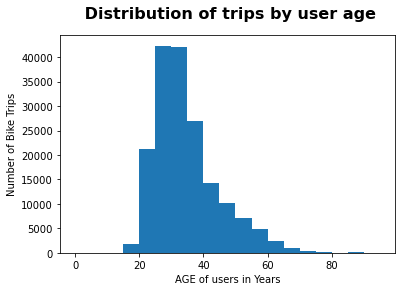

In [4]:
# age distribution 
bin_edges = np.arange(0, 100, 5)
plt.hist(data = df_bike_final, x = 'AGE', bins = bin_edges);
plt.title(" Distribution of trips by user age", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('AGE of users in Years')
plt.ylabel('Number of Bike Trips');



## User type relation to trip duration

> subscribers tend to make short trips (no longer than 10 min) while customers tend to have longer trips

Text(0.5, 1.05, 'User Type and duration relationship')

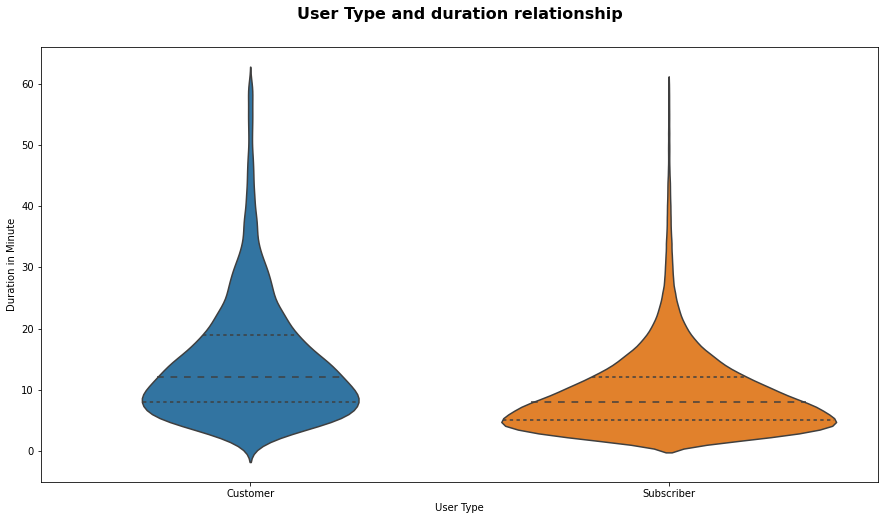

In [5]:
df_bike_duration_under_60 = df_bike_final.query('duration_minute <= 60')
plt.figure(figsize=[15, 8])
sb.violinplot(data=df_bike_duration_under_60, x='user_type', y='duration_minute',inner='quartile')
plt.xlabel('User Type')
plt.ylabel('Duration in Minute')
plt.title("User Type and duration relationship", y=1.05, fontsize=16, fontweight='bold')



## User Type and time usage

Subscribers tend to use the system in the rush hours 8 am and 5 pm and in working days, while customers trips are almost equally distributed all day long and all days of the week but they tend to use it especially in the weekends.

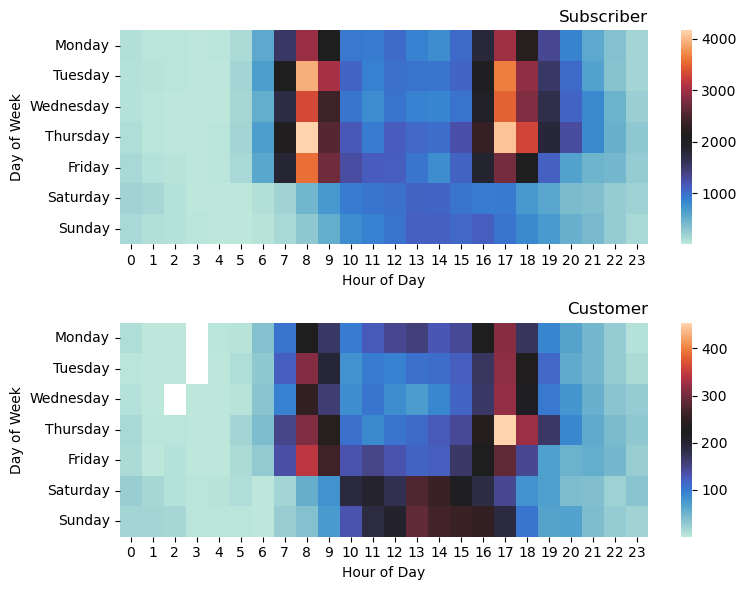

In [6]:
plt.figure(figsize = (8,6), dpi = 100)

plt.subplot(2, 1, 1)
customers = df_bike_final[df_bike_final['user_type'] == "Subscriber"] 
ct_counts = customers.groupby(['start_day', 'start_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_day', columns='start_hour', values='count')
ct_counts = ct_counts.reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
sb.heatmap(ct_counts, cmap='icefire');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2)
customers = df_bike_final[df_bike_final['user_type'] == "Customer"] 
ct_counts = customers.groupby(['start_day', 'start_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_day', columns='start_hour', values='count')
ct_counts = ct_counts.reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
sb.heatmap(ct_counts, cmap='icefire');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.tight_layout()



## Bike most used
Some of the bike are used more than others. Some of the bike may be located at places frequented mostly by susbcribers who uses the system for work related reasons.
Top 2 bikes were used mostly in rush hours and less used in weekends 

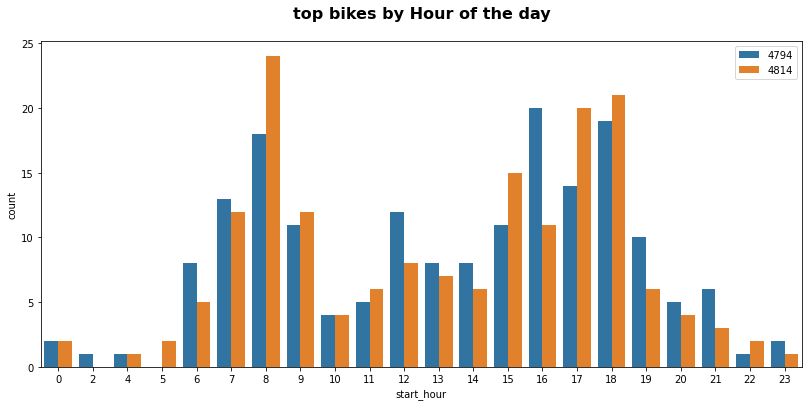

In [7]:
#top 2 bikes used
plt.figure(figsize = [30, 6])
df_bike_4794_4814 = df_bike_final.query("bike_id in ('4794','4814')")
plt.subplot(1, 2, 1)
sb.countplot(data = df_bike_4794_4814, x = 'start_hour', hue = 'bike_id')
plt.legend();
plt.title('top bikes by Hour of the day', y=1.05, fontsize=16, fontweight='bold');



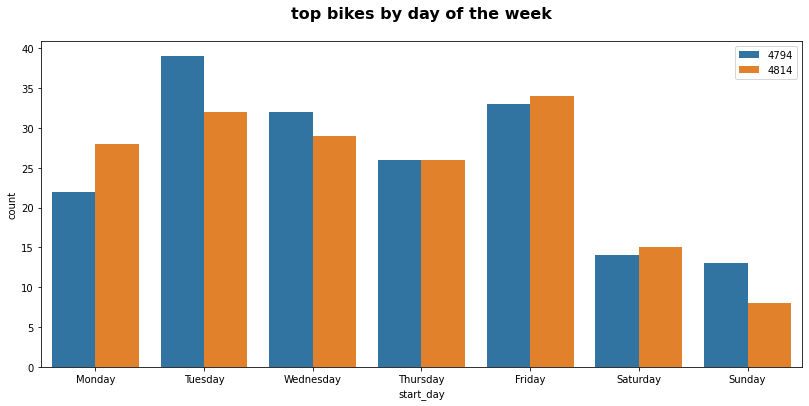

In [8]:


day_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

plt.figure(figsize = [30, 6])
df_bike_4794_4814 = df_bike_final.query("bike_id in ('4794','4814')")
plt.subplot(1, 2, 1)
sb.countplot(data = df_bike_4794_4814, x = 'start_day', hue = 'bike_id', order = day_order)
plt.legend();
plt.title('top bikes by day of the week', y=1.05, fontsize=16, fontweight='bold');


With further information we can even help the stakeholders of the company to best handle the fleet of bikes (optimize bikes lifecycle logistically).by calculating distance made by each bike and which ones are likely soon to need some spare parts to be changed or we can propose to change bikes between stations ( take the most used bikes in the most frequented stations this month and replace them by the less used bikes in the less frequented stations) to have some sort of balance.

### Generate Slideshow


In [9]:
!jupyter nbconvert Part_II_FORD_GOBIKE_SYSTEM_slide_deck.ipynb --to slides --no-prompt --TagRemovePreprocessor.remove_input_tags={\"to_remove\"} --post serve --SlidesExporter.reveal_theme=simple

C:\Users\abenyahya\Anaconda3\lib\site-packages\traitlets\traitlets.py:2562: FutureWarning: --TagRemovePreprocessor.remove_input_tags={"to_remove"} for containers is deprecated in traitlets 5.0. You can pass `--TagRemovePreprocessor.remove_input_tags item` ... multiple times to add items to a list.
  warn(
[NbConvertApp] Converting notebook Part_II_FORD_GOBIKE_SYSTEM_slide_deck.ipynb to slides
[NbConvertApp] Writing 755005 bytes to Part_II_FORD_GOBIKE_SYSTEM_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\abenyahya\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\abenyahya\Anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\abenyahya\Anaconda3\lib\site-packages\traitlets\config\ap